Loading MNIST dataset...
Original data shape: (70000, 784)
Applying PCA...
Explained variance ratio (PCA): [0.10009538 0.07460617]


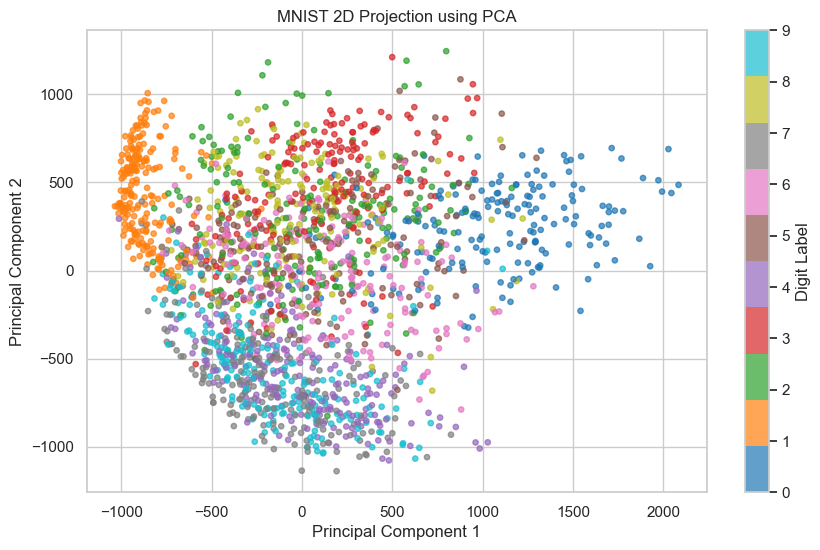

Applying T-SNE... (this may take a minute)


AttributeError: 'NoneType' object has no attribute 'split'

In [5]:
# highdim-to-2d.py

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Set seaborn style for plots
sns.set(style='whitegrid', palette='muted')

# -------------------------------
# Load the MNIST dataset
# -------------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Original data shape: {X.shape}")  # (70000, 784)

# -------------------------------
# Sample a subset for faster T-SNE
# -------------------------------
SAMPLE_SIZE = 2000
X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# -------------------------------
# 1. PCA: High-Dimensional to 2D
# -------------------------------
print("Applying PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)

# Visualize PCA result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST 2D Projection using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# -------------------------------
# 2. T-SNE: High-Dimensional to 2D
# -------------------------------
print("Applying T-SNE... (this may take a minute)")
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='random', random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Visualize T-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST 2D Projection using T-SNE")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.grid(True)
plt.show()
